In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/kaggle/input/motor-maintenance/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.shape

(10000, 10)

In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

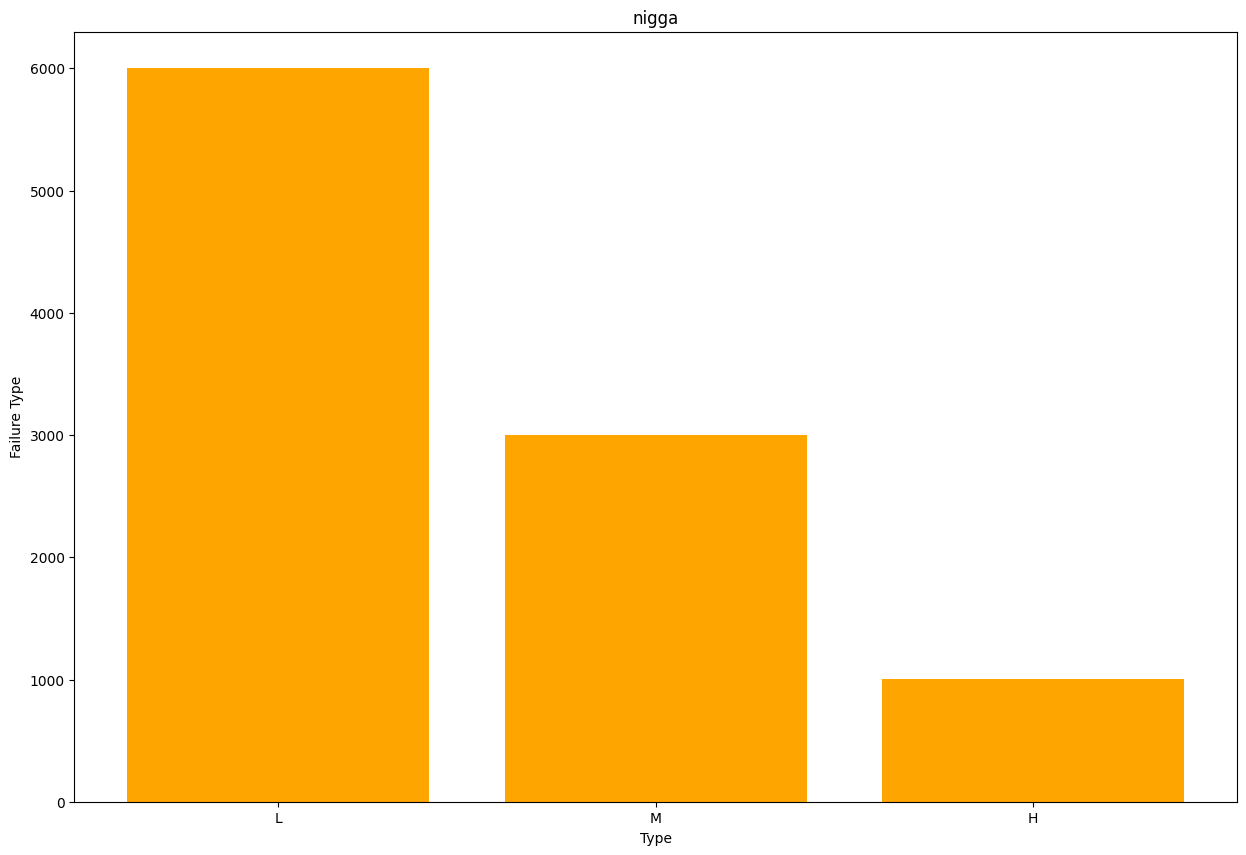

In [9]:
fig=df['Type'].value_counts()
plt.figure(figsize=(15, 10))
plt.title('nigga')
plt.bar(fig.index, fig, color = 'orange')
plt.xlabel('Type')
plt.ylabel('Failure Type')
plt.show()

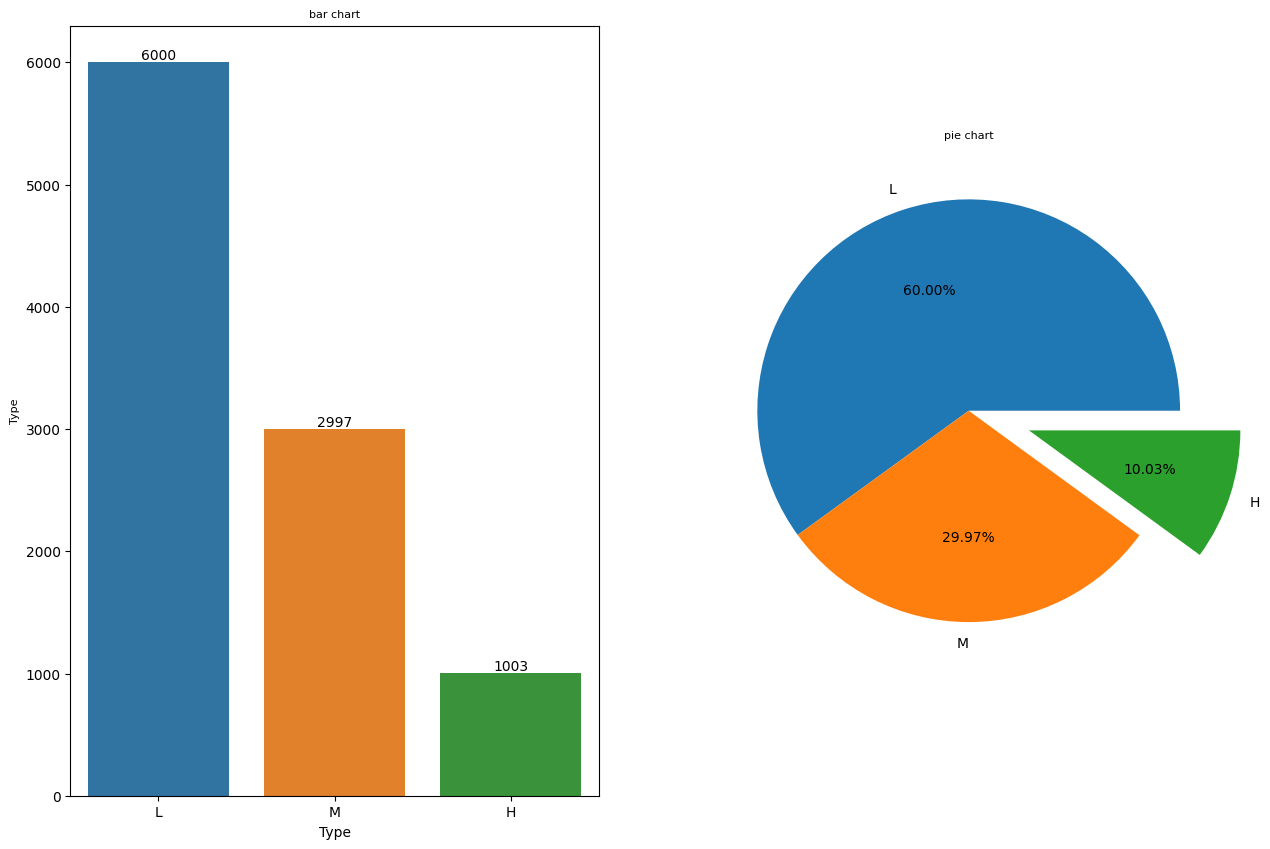

In [10]:
fig, ax=plt.subplots(ncols=2, nrows=1, figsize=(15, 10))
ax[0].set_title('bar chart', fontdict={'size': 8})
figure=sns.countplot(x=df.Type, ax=ax[0], order=['L','M','H'])
for container in figure.containers:
  figure.bar_label(container)
ax[0].set_ylabel('Type', fontdict={'size': 8})
ax[1].set_title('pie chart', fontdict={'size': 8})
ax[1].pie(x=df.Type.value_counts().values, labels=df.Type.value_counts().index, autopct='%1.2f%%', explode=[0, 0, 0.3])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

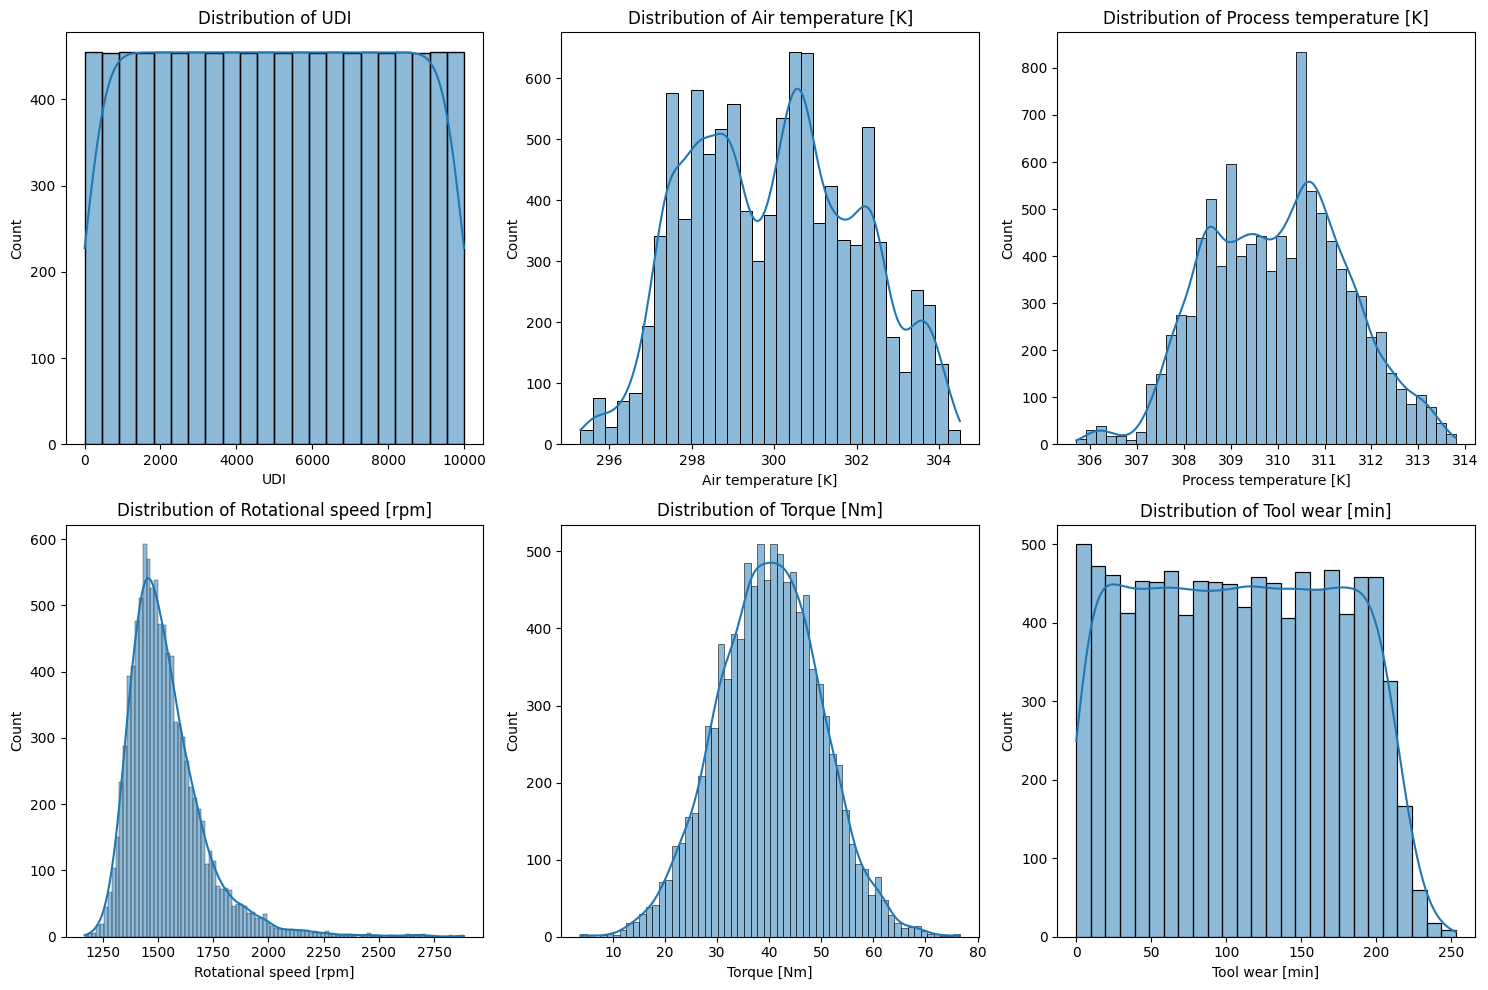

In [11]:
plt.figure(figsize=(15, 10))
numirecal_colomns=df.select_dtypes(include=['int','float']).columns
for i, col in enumerate(numirecal_colomns[:6], 1):
 plt.subplot(2, 3, i)
 sns.histplot(df[col],kde=True)
 plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Figure size 3500x2000 with 0 Axes>

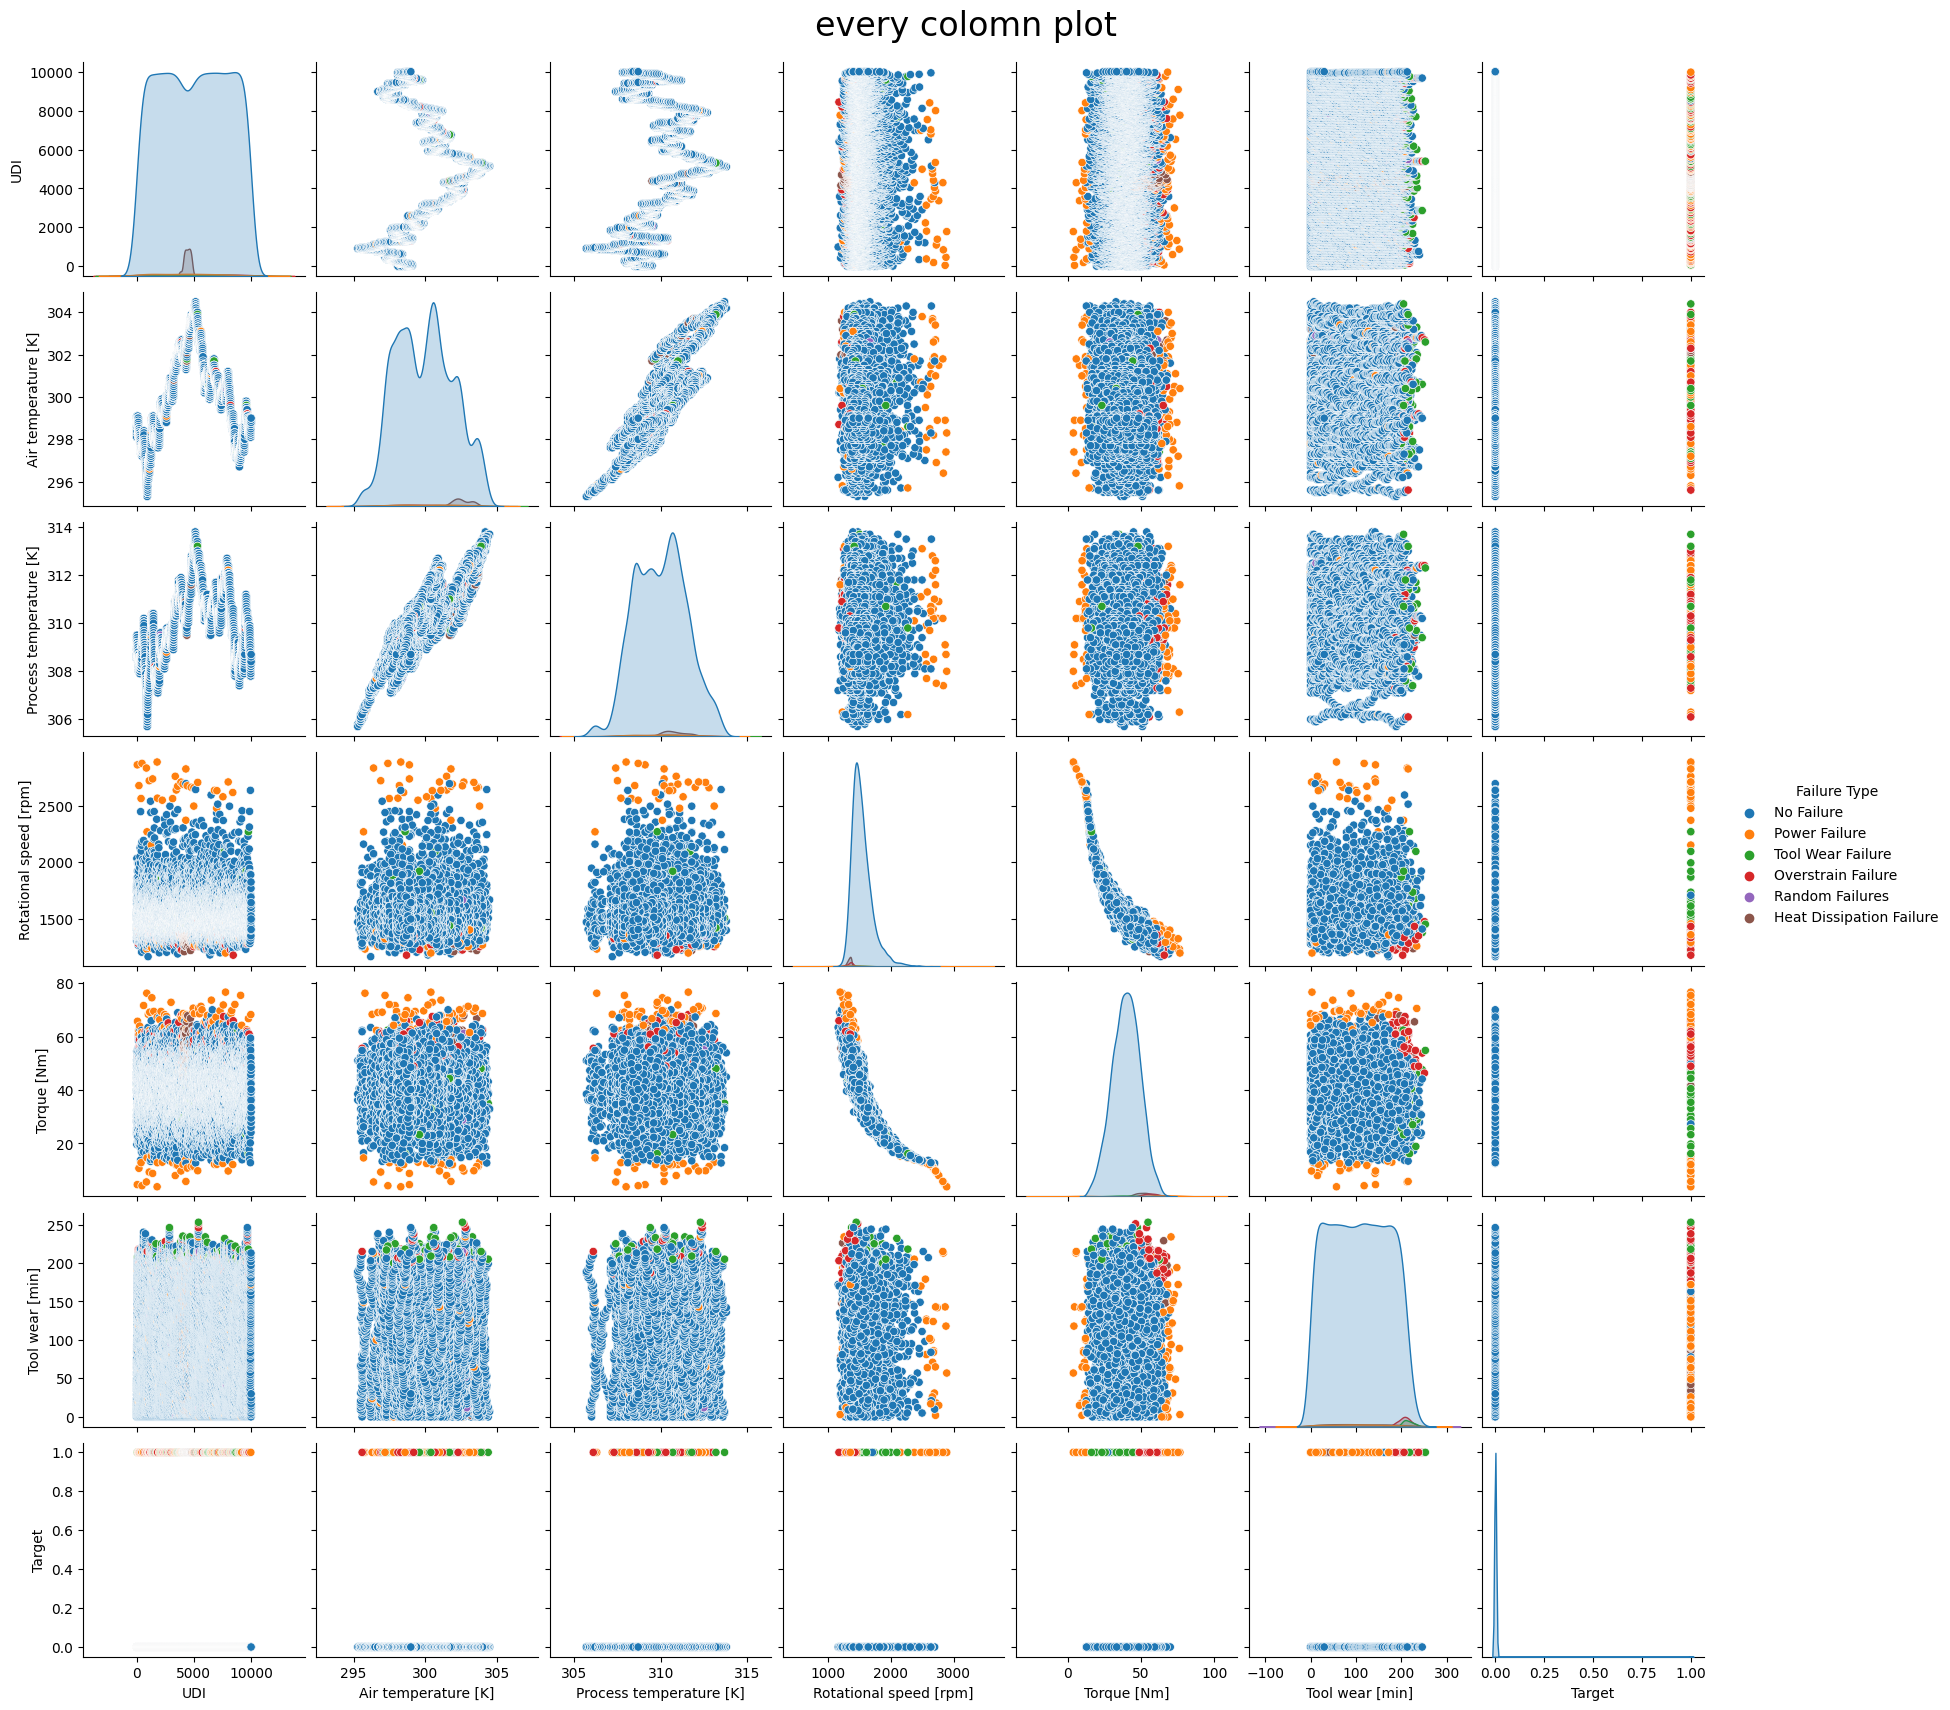

In [12]:
plt.figure(figsize=(35, 20))
pairplot=sns.pairplot(data=df,hue='Failure Type')
pairplot.fig.suptitle('every colomn plot',fontsize=24)
pairplot.fig.subplots_adjust(top=0.95)
plt.show()

In [13]:
label_encoder=LabelEncoder()
label_encoder.fit(df['Type'])
df['Type']=label_encoder.transform(df['Type'])
label_encoder.fit(df['Target'])
df['Target']=label_encoder.transform(df['Target'])

In [14]:
x=df.drop('Failure Type',axis=1)
y=df['Failure Type'].values

In [15]:
x = pd.get_dummies(x,drop_first=True)
col_name = x.columns

In [16]:
x=x.values

In [17]:
label_encoder.fit(y)
y = label_encoder.transform(y)

In [18]:
smk = SMOTE(random_state=42)
X_res, y_res = smk.fit_resample(x, y)
y__ = pd.Series(y_res)
y__.value_counts()

1    9652
3    9652
5    9652
2    9652
4    9652
0    9652
Name: count, dtype: int64

In [19]:
X_res.shape,y_res.shape

((57912, 10007), (57912,))

In [20]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({1: 9652, 0: 112, 3: 95, 2: 78, 5: 45, 4: 18})
Resampled Dataset Shape Counter({1: 9652, 3: 9652, 5: 9652, 2: 9652, 4: 9652, 0: 9652})


In [21]:
df_new = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [22]:
col_new=col_name
col_new=col_new.to_list()
col_new.append("Failure Type")
df_new.columns=col_new
df_new.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Product ID_H29425,Product ID_H29432,...,Product ID_M24835,Product ID_M24842,Product ID_M24846,Product ID_M24847,Product ID_M24849,Product ID_M24851,Product ID_M24855,Product ID_M24857,Product ID_M24859,Failure Type
0,1.0,2.0,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2.0,1.0,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,1.0,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4.0,1.0,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5.0,1.0,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [23]:
x= df_new.drop("Failure Type" ,axis =1)
y=df_new["Failure Type"]

In [24]:
x = pd.get_dummies(x,drop_first=True)

In [25]:
x = StandardScaler().fit_transform(x)

In [26]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y ,test_size=.2 ,shuffle=True ,stratify=y)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix ,ConfusionMatrixDisplay ,accuracy_score ,recall_score ,precision_score ,f1_score)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def select_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)
    models = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100, n_jobs=-1), XGBClassifier(n_estimators=100)]
    acc_train = []
    acc_test = []
    model_names = []

    for model in models:
        # fitting
        model.fit(x_train, y_train)
        # prediction
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        # accuracy
        train_acc = round(model.score(x_train, y_train) * 100, 2)
        test_acc = round(model.score(x_test, y_test) * 100, 2)

        acc_train.append(train_acc)
        acc_test.append(test_acc)
        model_names.append(type(model).__name__)

    dic = {"Model": model_names, "Train_acc": acc_train, "Test_acc": acc_test}
    return pd.DataFrame(dic)

In [ ]:
result_df = select_model(x, y)
print(result_df)